# Visualizing Frame Dragging in Kerr Spacetime

### Importing required modules

In [6]:
import numpy as np

from einsteinpy.geodesic import Nulllike
from einsteinpy.plotting import StaticGeodesicPlotter

### Setting up the system
  - Initial position & momentum of the test partcle
  - Spin of the Kerr Black Hole
  - Other solver parameters
  
Note that, we are working in _M_-Units ($G = c = M = 1$). Also, setting momentum's $\phi$-component to negative, implies an initial retrograde trajectory.

In [7]:
position = [2.5, np.pi / 2, 0.]
momentum = [0., 0., -2.]
a = 0.99
steps = 7440  # As close as we can get before the integration becomes highly unstable
delta = 0.0005
omega = 0.01
suppress_warnings = True

Here, `omega`, the coupling between the hamiltonian flows, needs to be decreased in order to decrease numerical errors and increase integration stability. Reference: https://arxiv.org/abs/2010.02237.

Also, `suppress_warnings` has been set to `True`, as the error would grow exponentially, very close to the black hole.

### Calculating the geodesic

In [8]:
geod = Nulllike(
    metric="Kerr",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True,
    omega=omega,
    suppress_warnings=suppress_warnings
)

### Plotting the geodesic in 3D

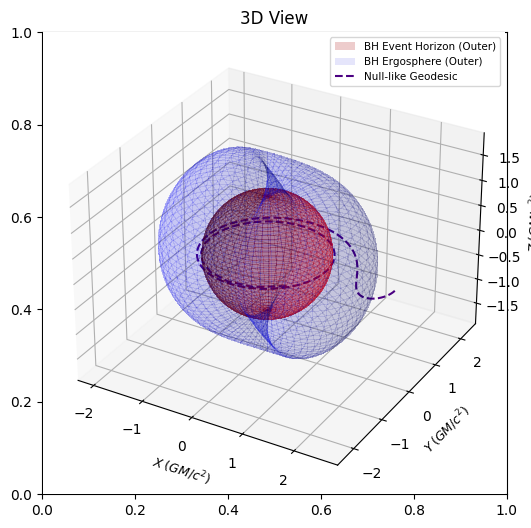

In [9]:
sgpl = StaticGeodesicPlotter(bh_colors=("red", "blue"))
sgpl.plot(geod, color="indigo", title="3D View", aspect="equal")
sgpl.show()

### Plotting the geodesic in 2D

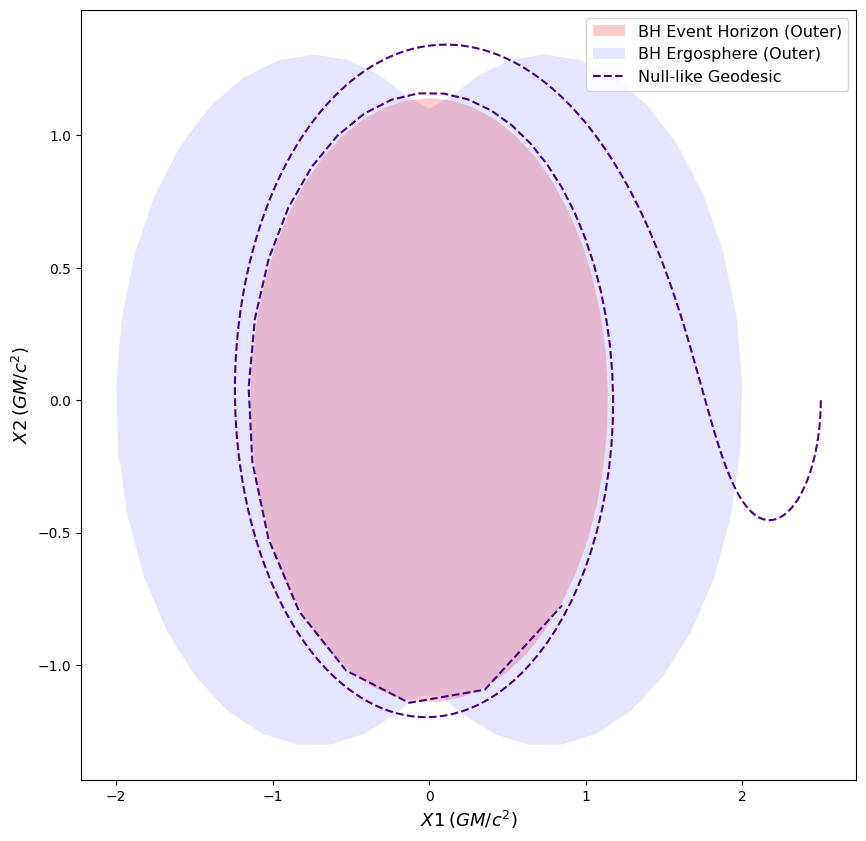

In [10]:
sgpl = StaticGeodesicPlotter(bh_colors=("red", "blue"))
sgpl.plot2D(geod, coordinates=(1, 2), figsize=(10, 10), color="indigo") # Plot X vs Y
sgpl.show()

As can be seen in the plot above, the photon's trajectory is reversed, due to frame-dragging effects, so that, it moves in the direction of the black hole's spin, before eventually falling into the black hole.

Also, the last few steps seem to have a larger `delta`, but that is simply because of huge numerical errors, as the particle has crossed the Event Horizon.